# Pymaceuticals Inc.
---

### Analysis

- The box plot shows that Capomulin and Ramicane seems to be more effective at treating tumors due to both having a smaller final tumor volume than their competitors (Infubinol and Ceftamin).

- Capomulin seems to be very effective at treating Mouse b128's tumor.  We can see an initial increase in tumor volume before the drug begins to kick in at around the 5th day.  We then see a dramatic decrease to an all-time low at ~30 days.  However, it seems like the tumor bounces back at the 35th day, which could be due to not taking medication or the tumor gaining resistance to the drug.

-  From the scatter plot we can see that there may be a positive correlation with mouse weight and the average tumor volume.  This is further confirmed with our linear regression and correlation coefficient of 0.84, an indication of a strong relationship between the two variables.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Mouse_metadata.csv"
study_results_path = "/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_merged = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
df_merged.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
df_merged['Mouse ID'].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = df_merged[df_merged.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_dupe = df_merged.loc[df_merged['Mouse ID'].isin(duplicates), :]

In [6]:
# Checking the number of mice in the clean DataFrame.
df_cleaned = df_merged.drop(df_dupe.index)

df_cleaned['Mouse ID'].nunique()

248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_reg = df_cleaned.groupby("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = drug_reg.mean()["Tumor Volume (mm3)"]
med = drug_reg.median()["Tumor Volume (mm3)"]
var = drug_reg.var()["Tumor Volume (mm3)"]
std = drug_reg.std()["Tumor Volume (mm3)"]
sem = drug_reg.sem()["Tumor Volume (mm3)"]
# Assemble the resulting series into a single summary DataFrame.
summary = pd.DataFrame({"Mean Tumor Volume":mean,"Median Tumor Volume":med, "Tumor Volume Variance":var,"Tumor Volume Std. Dev.":std,"Tumor Volume Std. Err.":sem})

summary.head()

<ipython-input-44-a6c0d3f54496>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = drug_reg.mean()["Tumor Volume (mm3)"]
<ipython-input-44-a6c0d3f54496>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  med = drug_reg.median()["Tumor Volume (mm3)"]
<ipython-input-44-a6c0d3f54496>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  var = drug_reg.var()["Tumor Volume (mm3)"]
<ipython-input-44-a6c0d3f54496>:9: FutureWa

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_df = drug_reg.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

aggregate_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

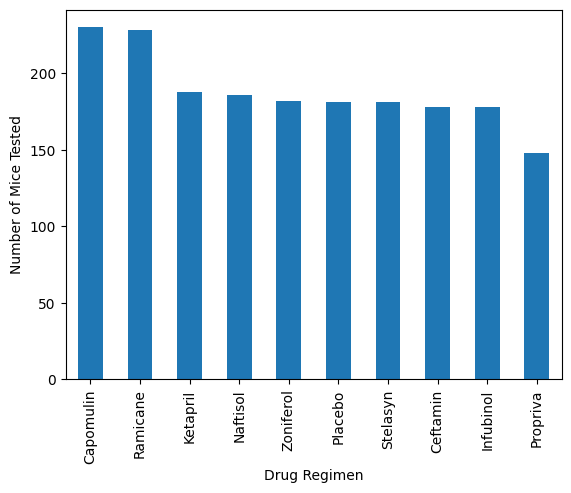

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar = pd.DataFrame(drug_reg.count()["Timepoint"]).sort_values("Timepoint",ascending=False)
pandas_bar_plot = bar.plot.bar(legend=False).set_ylabel("Number of Mice Tested")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

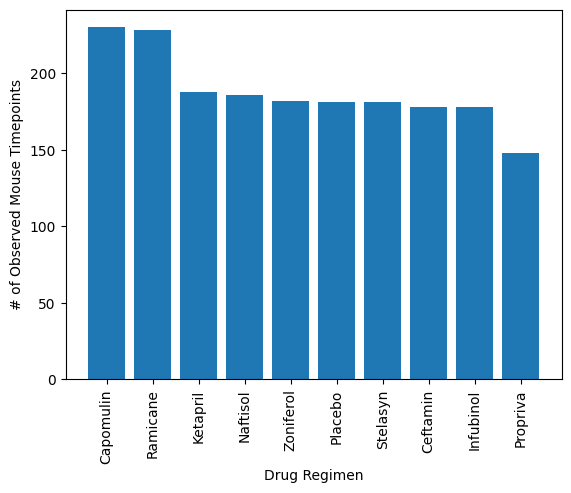

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = bar.index.values
y = bar['Timepoint']
plt.bar(x,y)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

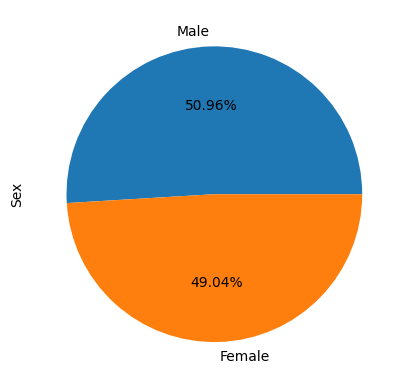

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
males = df_cleaned.loc[df_cleaned["Sex"]=="Male"].count()["Mouse ID"]
females = df_cleaned.loc[df_cleaned["Sex"]=="Female"].count()["Mouse ID"]
labels = ["Male","Female"]
form = "%.2f%%"
sex_counts = pd.DataFrame({"Sex":[males,females]},index=labels)
sex_pandas = sex_counts.plot.pie(y="Sex",autopct=form,legend=False)

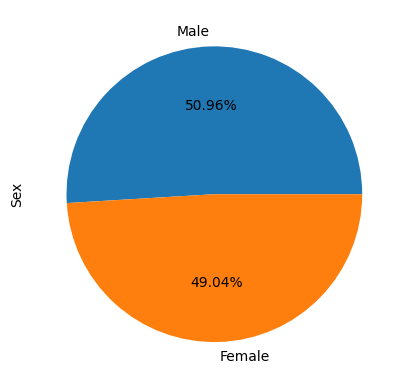

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie([males,females],labels=labels,autopct="%.2f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(df_cleaned.groupby(["Drug Regimen","Mouse ID"]).max()["Timepoint"])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
reset_df = max_timepoint_df.reset_index()

vol_df = pd.merge(reset_df,df_cleaned,on=["Drug Regimen","Mouse ID","Timepoint"],how="left")


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
four_drugs = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in four_drugs:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    temp_df = vol_df.loc[vol_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]

    # add subset
    final_tumor_vol.append(temp_df)

    # Determine outliers using upper and lower bounds
    quartiles = temp_df.quantile([.25,.5,.75])
    q1 = quartiles[.25]
    q3 = quartiles[.75]
    iqr = q3 - q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    outliers = temp_df.loc[(temp_df > upper) | (temp_df < lower)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


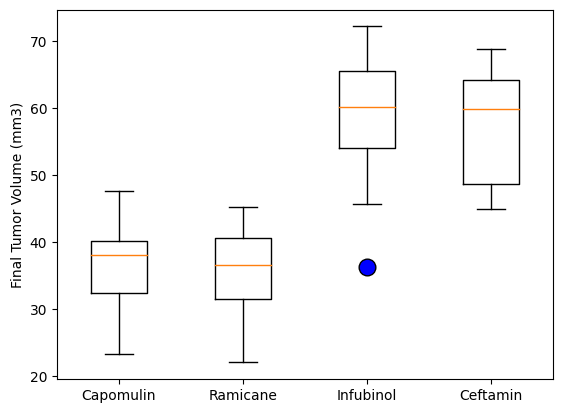

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
flierprops = dict(markerfacecolor='b',markersize=12)
ax.boxplot(final_tumor_vol, labels=four_drugs, flierprops=flierprops)
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

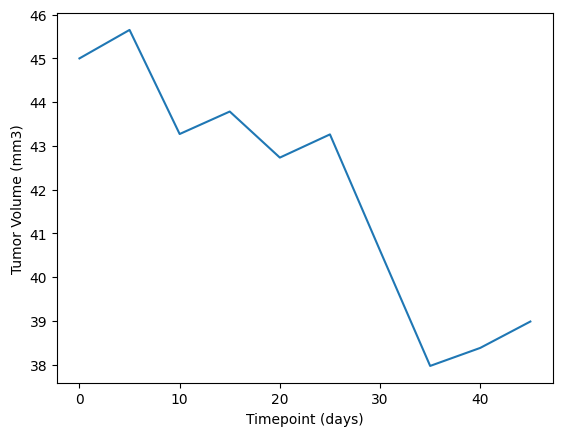

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line = df_cleaned.loc[(df_cleaned["Drug Regimen"]=="Capomulin") & (df_cleaned["Mouse ID"] == "b128")]

x = line["Timepoint"]
y = line["Tumor Volume (mm3)"]
plt.plot(x,y)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

<ipython-input-62-9f999a3aeb39>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scatter = capomulin_df.groupby("Mouse ID").mean()


Text(0, 0.5, 'Tumor Volume (mm3)')

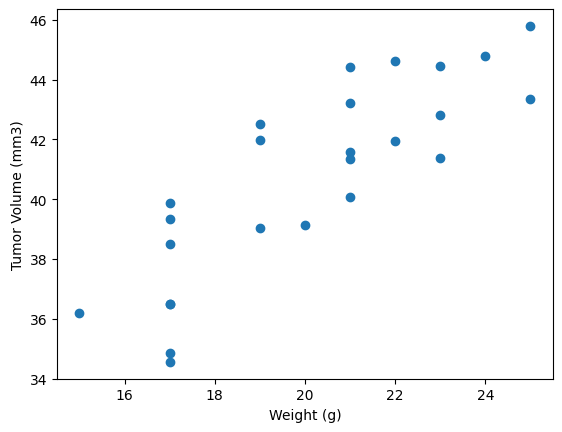

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = df_cleaned.loc[df_cleaned["Drug Regimen"] == "Capomulin",:]

scatter = capomulin_df.groupby("Mouse ID").mean()

x = scatter["Weight (g)"]
y = scatter["Tumor Volume (mm3)"]
plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


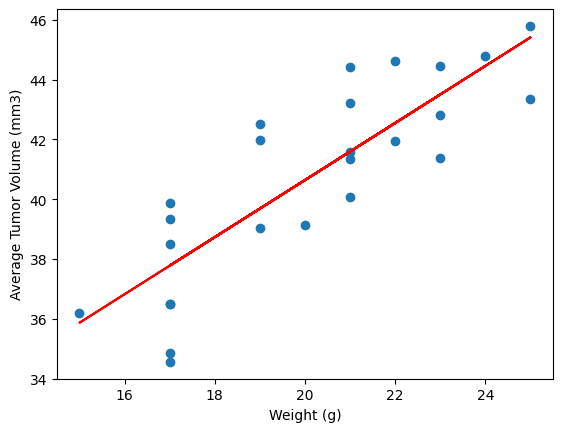

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = round(x.corr(y),2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")

plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
plt.show()